# 코드 정리

In [1]:
!pip install category_encoders

# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 전처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# train, test 나누기
from sklearn.model_selection import train_test_split

import category_encoders as ce

from sklearn.compose import ColumnTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 740 kB/s 


In [2]:
df = pd.read_csv('bank-full.csv', sep =';')
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [3]:
categorical = df.drop(labels = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], axis=1)
numeric = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [4]:
categorical

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome    y  
0       may  unknown   no  
1       may  unknown   no  
2       may  unknown   no  
3       may  unknown   no  
4       may  unknown   no  
...     ...      ...  ...  
45206   nov  unknown  yes  
45207   nov  unknown  yes  
45208   nov  success  yes  
45209   nov  unknown   no  
45210   nov    other   no  

[45211 rows x 10 columns]

In [5]:
numeric

age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]

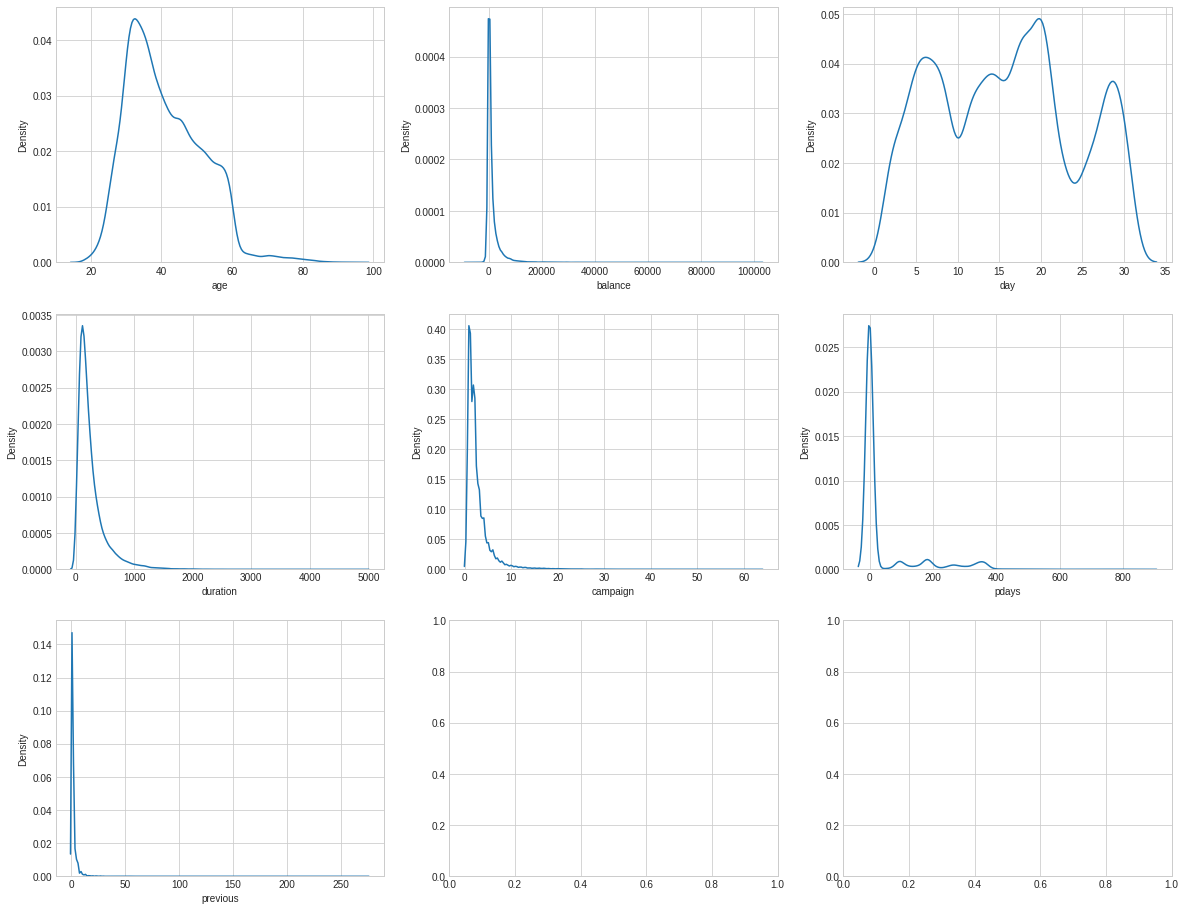

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16))

i = 0
j = 0

for column in numeric.columns:
  sns.kdeplot(numeric[column], ax=ax[j,i])
  if i/2 < 1:
    i += 1
  else:
    j += 1
    i = 0

In [7]:
from scipy.stats import skew, kurtosis

skew(numeric)


array([ 0.6847952 ,  8.36003095,  0.09307593,  3.14421378,  4.89848764,
        2.61562869, 41.84506609])

In [8]:
# 종속변수 y를 수치형으로 바꿔주기. no를 0(정상)으로, yes를 1(이상)로 변환
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1

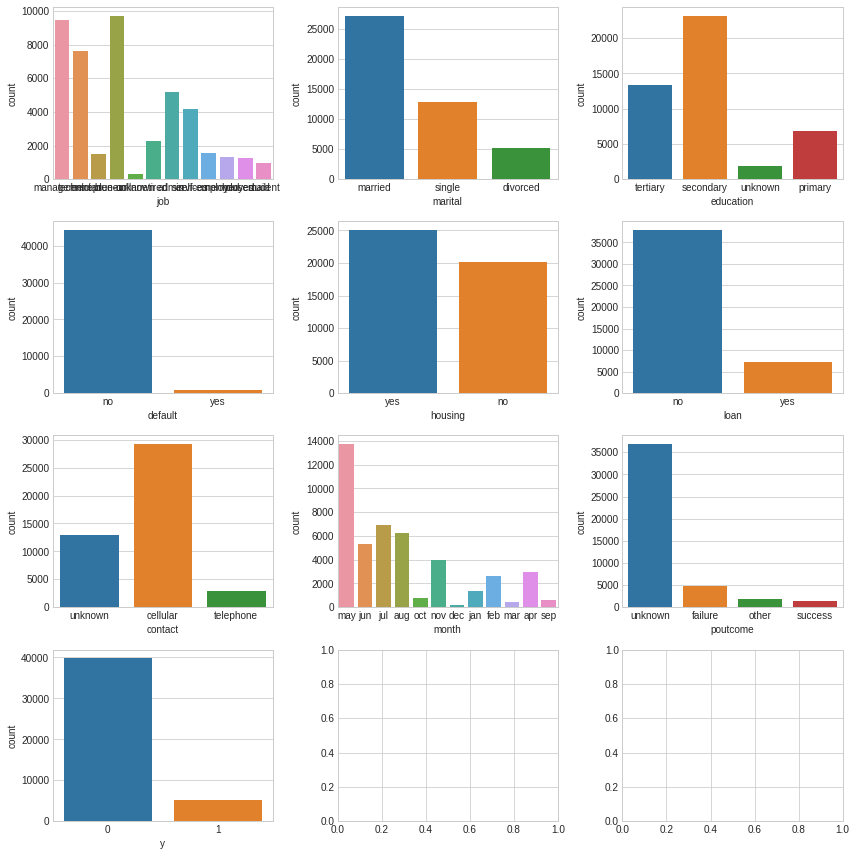

In [10]:
li_cat_feats = list(categorical) 
nr_rows = 4
nr_cols = 3 
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3)) 

for r in range(0, nr_rows): 
  for c in range(0, nr_cols): 
    i = r*nr_cols+c 
    if i < len(li_cat_feats): 
      sns.countplot(x=li_cat_feats[i], data=df, ax = axs[r][c]) # , y=df['y']

plt.tight_layout() 
plt.show()

In [ ]:


# object 타입을 int64 타입으로 바꿔주기
df['y'] = df['y'].astype('int64')

## unknown값 처리. 사실상 Null값과 같다고 판단. 전처리 진행.
df.drop('poutcome', axis=1, inplace = True) # poutcome 변수 삭제
unknowndr1 = df[df['job'].str.contains('unknown')].index
df.drop(unknowndr1, inplace=True)
unknowndr2 = df[df['education'].str.contains('unknown')].index
df.drop(unknowndr2, inplace=True)
unknowndr3 = df[df['contact'].str.contains('unknown')].index
df.drop(unknowndr3, inplace=True)

df.reset_index(drop=True, inplace = True) #인덱스 재 정렬

# y 변수 저장
df_labels = df['y']

#Binary Encoding
df_bi_cat = df[['month', 'job']]
df1 = ce.BinaryEncoder(cols = ['month']).fit_transform(df_bi_cat)
df2 = ce.BinaryEncoder(cols = ['job']).fit_transform(df1)

#One Hot Encoding
df_one_cat = df[['marital', 'education', 'default','housing',
       'loan', 'contact']] # month와 job을 제외한 범주형 변수 원핫인코딩

cat_pipeline = Pipeline([
    ('1hot_encoder', OneHotEncoder(sparse=False)),
    ])
df_cat_tr = cat_pipeline.fit_transform(df_one_cat)

#Robust Scaling
df_std_big_num = df[['balance', 'duration', 'pdays']] # 표준편차가 큰 수치형 변수
num_pipeline = Pipeline([
        ('rb_scaler', RobustScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_std_big_num)

num_attribs = list(df_std_big_num) #키들(컬럼명)만 list로 반환
cat_attribs = list(df_one_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

full_df = pd.DataFrame(full_pipeline.fit_transform(df))

df_oth = df[['age', 'day', 'campaign', 'previous']] # 나머지 수치형 변수들

X = pd.concat([full_df,df2,df_oth], axis =1)
data = pd.concat([full_df,df2,df_oth, df_labels], axis =1)
data.columns

In [ ]:
# 정상/이상 구분
normal = data.loc[data['y'] == 0]
anomaly = data.loc[data['y'] == 1]

# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1, random_state=3).reset_index(drop=True) #shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]

# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]

# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]

X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

X_train.columns

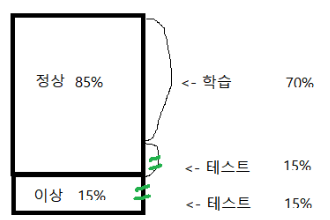

In [ ]:
# 선형 상관성 존재하는 변수들 제거
X_train_lowcorr = X_train.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
X_test_lowcorr = X_test.drop([3, 5, 7, 9, 11, 13, 15, 'month_0', 'month_2'], axis=1)
X_test_lowcorr

In [ ]:
trainset = pd.concat([X_train_lowcorr,Y_train],axis = 1)
testset = pd.concat([X_test_lowcorr,Y_test],axis = 1)
dataset = pd.concat([trainset,testset],axis = 0)

Normal = dataset.loc[dataset['y'] == 0]
Anomaly = dataset.loc[dataset['y'] == 1]

* 참고로 

변수 0 은 balance의 로버스트 스케일링 한 것

변수 1 은 duration의 로버스트 스케일링 한 것

변수 2 는 pdays의 로버스트 스케일링 한 것

변수 3~16은 'marital', 'education', 'default','housing',
       'loan', 'contact' 원핫인코딩 한 것

In [ ]:
#정상 데이터의 변수별 분포 확인

# for col in dataset.columns:
#     sns.distplot(Normal.loc[Normal[col].notnull(), col])
#     plt.title(col)
#     plt.show()

In [ ]:
#이상 데이터의 변수별 분포 확인

# for col in dataset.columns:
#     sns.distplot(Anomaly.loc[Anomaly[col].notnull(), col])
#     plt.title(col)
#     plt.show()

EDA추가

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,16))

i = 0
j = 0

for column in X_data.columns:
  sns.kdeplot(X_data[column], ax=ax[j,i])
  if i/4 < 1:
    i += 1
  else:
    j += 1
    i = 0